In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn import linear_model, preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score as rs
from sklearn.metrics import precision_score as ps
from sklearn.metrics import f1_score as fs
from sklearn.metrics import balanced_accuracy_score as bas
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import log_loss
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import warnings



In [2]:
df=pd.read_csv("data.csv",index_col=0)
df=pd.DataFrame(df)
df

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
0,104,8,1,66.0,1,0,14,31,19,12,3,1,8,1
1,101,8,0,56.0,0,1,14,31,19,12,3,1,0,0
2,137,8,1,46.0,0,1,14,31,19,12,3,1,13,0
3,116,8,0,60.0,1,0,14,31,19,12,3,1,0,0
4,116,8,1,58.0,0,0,14,31,19,12,3,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
858,48,3,2,24.0,0,0,14,31,19,12,3,1,0,1
859,0,0,2,35.0,0,0,14,31,19,12,3,1,0,0
860,3,1,1,49.4,0,0,14,31,19,12,3,1,0,0
861,24,9,1,49.4,0,0,14,31,19,12,3,1,0,0


In [3]:
X=df.iloc[:,:-1]
X=np.array(X)
y=df.iloc[:,-1]
y=np.array(y)
print(X)

[[104.   8.   1. ...   3.   1.   8.]
 [101.   8.   0. ...   3.   1.   0.]
 [137.   8.   1. ...   3.   1.  13.]
 ...
 [  3.   1.   1. ...   3.   1.   0.]
 [ 24.   9.   1. ...   3.   1.   0.]
 [ 15.  27.   1. ...   3.   1.   0.]]


In [4]:
x=ColumnTransformer(transformers=[("encoder",OneHotEncoder(),[0,1,2,6,7,8,9,10,11,12])],remainder="passthrough")
X=(x.fit_transform(X)).toarray()
print(X)


[[ 0.   0.   0.  ... 66.   1.   0. ]
 [ 0.   0.   0.  ... 56.   0.   1. ]
 [ 0.   0.   0.  ... 46.   0.   1. ]
 ...
 [ 0.   0.   0.  ... 49.4  0.   0. ]
 [ 0.   0.   0.  ... 49.4  0.   0. ]
 [ 0.   0.   0.  ... 70.   0.   0. ]]


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1,stratify=y)

# LogisticRegression

In [6]:
from sklearn.linear_model import LogisticRegression as lr

grid_values = {'C': [0.001,0.01,0.1,1,10,100]}
logreg=lr(solver='liblinear',random_state=3)
classifier1 = GridSearchCV(logreg,grid_values)

classifier1.fit(X_train,y_train)
classifier1.best_params_

{'C': 100}

In [7]:
pred1= classifier1.predict(X_test)

In [8]:
recall_lr = rs(y_test,pred1)
precision_lr = ps(y_test,pred1)
f1_lr= fs(y_test,pred1)
ma_lr = classifier1.score(X_test,y_test)

print('*** Evaluation metrics for test dataset ***\n')
print('Logistic Regression Recall Score: ',recall_lr)
print('Logistic Regression Precision Score: ',precision_lr)
print('Logistic Regression F1 Score: ',f1_lr)
print('Logistic Regression Accuracy: ',ma_lr)

*** Evaluation metrics for test dataset ***

Logistic Regression Recall Score:  0.7727272727272727
Logistic Regression Precision Score:  0.9444444444444444
Logistic Regression F1 Score:  0.85
Logistic Regression Accuracy:  0.9653179190751445


# Decision Tree

In [9]:
from sklearn.tree import DecisionTreeClassifier as dtc
classifier2 = dtc(max_depth=6)
fit=classifier2.fit(X_train,np.array(y_train).reshape(y_train.shape[0],1))

In [10]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import GridSearchCV
#from sklearn.cross_validation import  cross_val_score

tree_para = {'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}
decission_tree=DecisionTreeClassifier()
classifier2= GridSearchCV(decission_tree, tree_para, cv=5)
classifier2.fit(X_train, y_train)
classifier2.best_params_

{'max_depth': 15}

In [11]:
pred2 = classifier2.predict(X_test)

In [12]:
recall_tree = rs(y_test,pred2)
precision_tree = ps(y_test,pred2)
f1_tree = fs(y_test,pred2)
ma_tree = classifier2.score(X_test,y_test)
print('*** Evaluation metrics for test dataset ***\n')
print('Decision Tree Recall Score: ',recall_tree)
print('Decision Tree Precision Score: ',precision_tree)
print('Decision Tree F1 Score: ',f1_tree)
print('Decision Tree Accuracy: ',ma_tree)

*** Evaluation metrics for test dataset ***

Decision Tree Recall Score:  0.7727272727272727
Decision Tree Precision Score:  0.8095238095238095
Decision Tree F1 Score:  0.7906976744186046
Decision Tree Accuracy:  0.9479768786127167


# SVM

In [13]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}
svm=SVC()
classifier3= GridSearchCV(svm, param_grid, refit = True, verbose = 3)
classifier3.fit(X_train, y_train)
classifier3.best_params_


Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.877 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.877 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.877 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.877 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.870 total time=   0.0s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.957 total time=   0.1s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.942 total time=   1.6s
[CV 3/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.942 total time=   0.3s
[CV 4/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.957 total time=   0.1s
[CV 5/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.920 total time=   0.1s
[CV 1/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.877 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=1, kernel=sigmoid

{'C': 1, 'gamma': 0.01, 'kernel': 'poly'}

In [14]:
pred3=classifier3.predict(X_test)

In [15]:
recall_svm = rs(y_test,pred3)
precision_svm = ps(y_test,pred3)
f1_svm = fs(y_test,pred3)
ma_svm= classifier3.score(X_test,y_test)

print('*** Evaluation metrics for test dataset ***\n')
print('SVM Recall Score: ',recall_svm)
print('SVM Precision Score: ',precision_svm)
print('SVM F1 Score: ',f1_svm)
print('SVM Accuracy: ',ma_svm)

*** Evaluation metrics for test dataset ***

SVM Recall Score:  0.8181818181818182
SVM Precision Score:  0.9
SVM F1 Score:  0.8571428571428572
SVM Accuracy:  0.9653179190751445



# KNN

In [16]:
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.model_selection import GridSearchCV
grid_params = { 'n_neighbors': [1,3,5,11,19], 'weights': ['uniform', 'distance'], 'metric':['euclidean', 'manhattan']} 
knn = KNeighborsClassifier()  
classifier4= GridSearchCV(knn, grid_params, cv=10, scoring='accuracy',verbose=1)
classifier4.fit(X_train, y_train)
classifier4.best_params_

Fitting 10 folds for each of 20 candidates, totalling 200 fits


{'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}

In [17]:
pred4 =classifier4.predict(X_test)


In [18]:
recall_knn = rs(y_test,pred4)
precision_knn = ps(y_test,pred4)
f1_knn = fs(y_test,pred4)
ma_knn = classifier4.score(X_test,y_test)
print('*** Evaluation metrics for test dataset ***\n')
print('KNN Recall Score : ',recall_knn)
print('KNN Precision Score: ',precision_knn)
print('KNN F1 Score: ',f1_knn)
print('KNN Accuracy: ',ma_knn)

*** Evaluation metrics for test dataset ***

KNN Recall Score :  0.6818181818181818
KNN Precision Score:  0.8333333333333334
KNN F1 Score:  0.7499999999999999
KNN Accuracy:  0.9421965317919075


# Naive Bayes

In [19]:
from sklearn.naive_bayes import GaussianNB

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

NB= GaussianNB()
classifier5= GridSearchCV(NB,params_NB)
classifier5.fit(X_train, y_train)

classifier5.best_params_

{'var_smoothing': 0.001873817422860383}

In [20]:
pred5 =classifier5.predict(X_test)

In [21]:
recall_naive= rs(y_test,pred5)
precision_naive = ps(y_test,pred5)
f1_naive = fs(y_test,pred5)
ma_naive = classifier5.score(X_test,y_test)
print('*** Evaluation metrics for test dataset ***\n')
print('Naive Bayse Recall Score: ',recall_naive)
print('Naive Bayse Precision Score: ',precision_naive)
print('Naive Bayse F1 Score: ',f1_naive)
print('Naive Bayse Accuracy: ',ma_naive)

*** Evaluation metrics for test dataset ***

Naive Bayse Recall Score:  0.6818181818181818
Naive Bayse Precision Score:  0.8823529411764706
Naive Bayse F1 Score:  0.7692307692307693
Naive Bayse Accuracy:  0.9479768786127167


 AUC=0.883
 AUC=0.873
 AUC=0.902
 AUC=0.831
 AUC=0.834


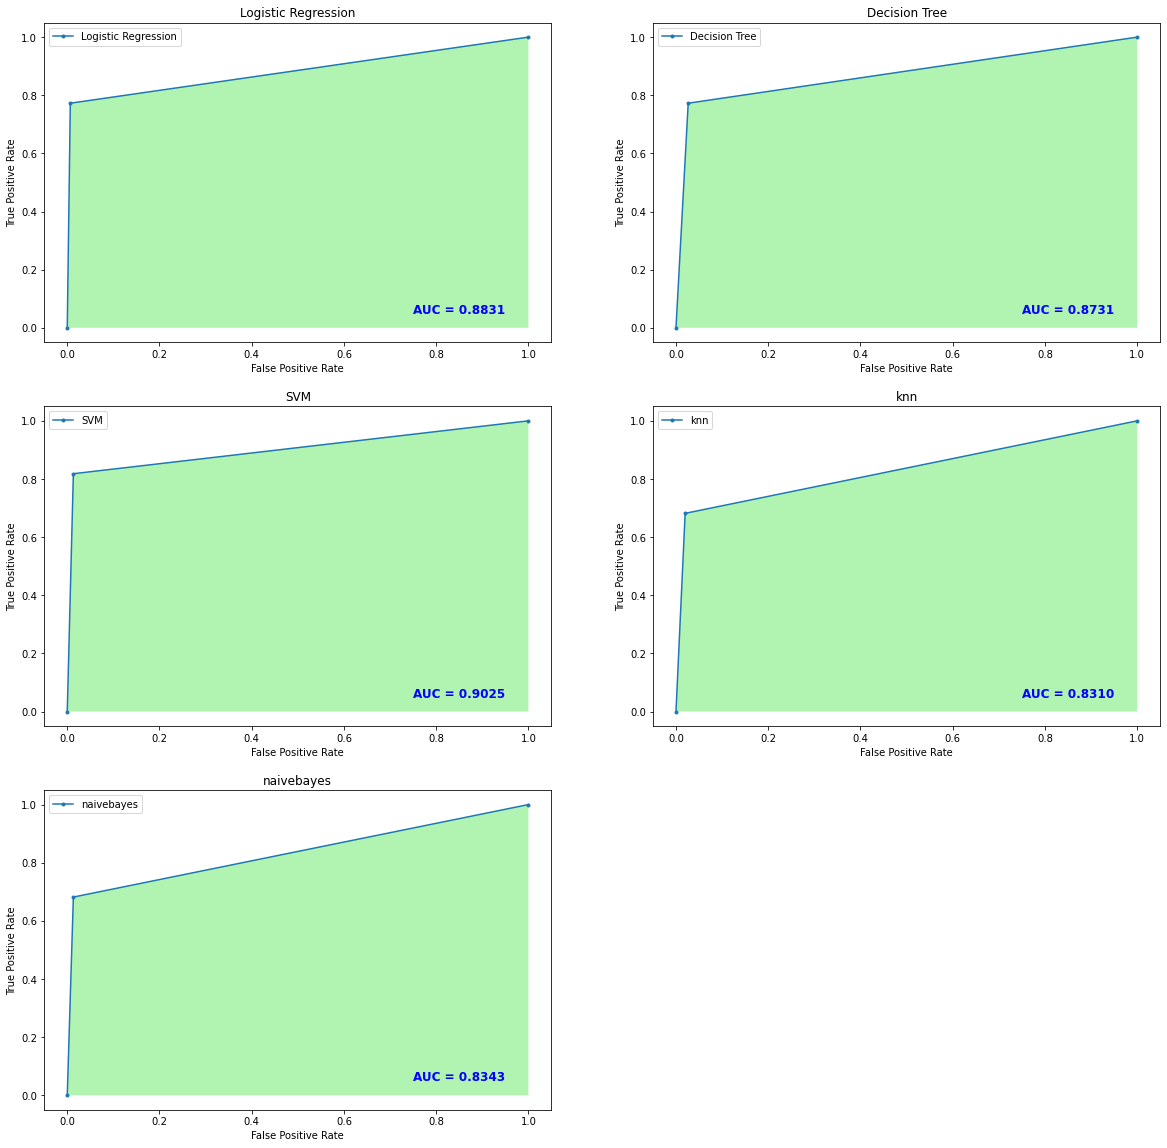

In [22]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
gs = gridspec.GridSpec(3, 2)
fig = plt.figure(figsize=(20,20))
labels = ['Logistic Regression', 'Decision Tree','SVM', 'knn','naivebayes']
for clf, lab, grd in zip([pred1, pred2, pred3, pred4, pred5],
                         labels,
                         [(0,0), (0,1), (1,0), (1,1), (2,0)]):
    ax = plt.subplot(gs[grd[0], grd[1]])
    ns_auc = roc_auc_score(y_test,clf)
    print( ' AUC=%.3f' % (ns_auc))
    ns_fpr, ns_tpr, _ = roc_curve(y_test, clf)
    # plot the roc curve for the model
    plt.plot(ns_fpr,ns_tpr, marker='.', label=lab)
    plt.fill_between(ns_fpr, ns_tpr, facecolor='lightgreen', alpha=0.7)
    plt.text(0.95, 0.05, 'AUC = %0.4f' % ns_auc, ha='right', fontsize=12, weight='bold', color='blue')
    # axis labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(lab)
    # show the legend
    plt.legend()
    # show the plot
plt.show()

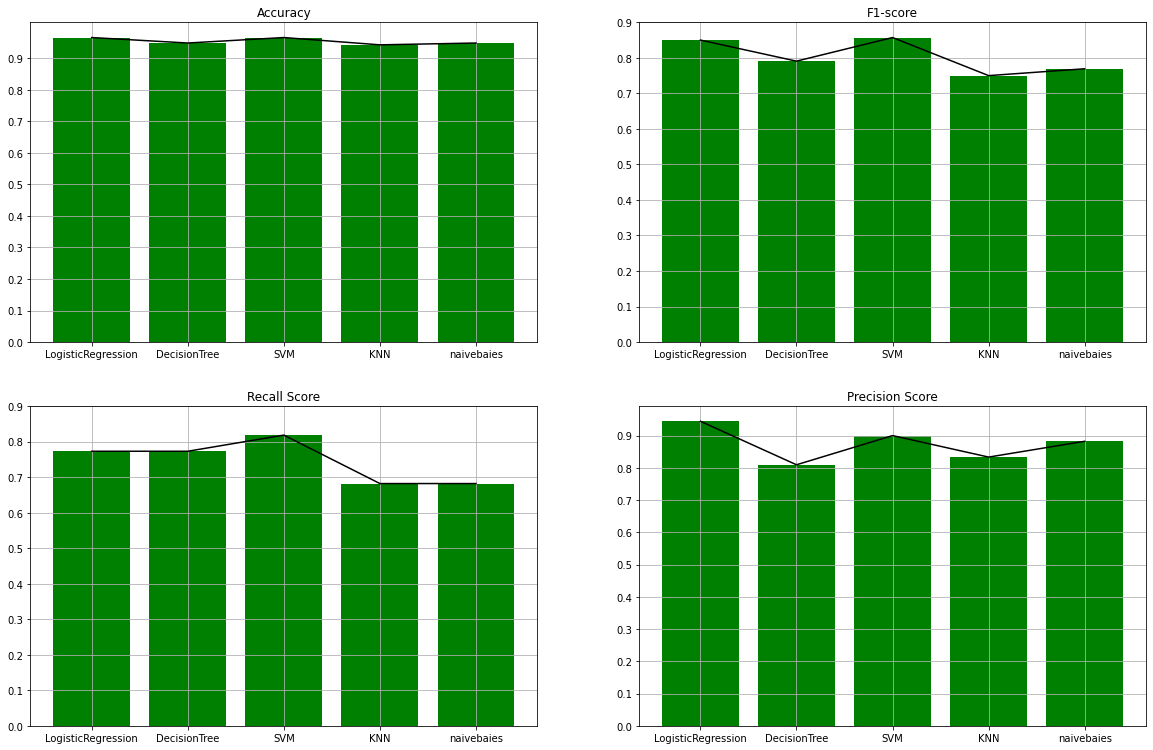

In [23]:
gs = gridspec.GridSpec(3, 2)
fig = plt.figure(figsize=(20,20))
labels = ["LogisticRegression",'DecisionTree','SVM','KNN','naivebaies']
label = ['Accuracy', 'F1-score','Recall Score', 'Precision Score']
ma_=0
f1_=0
recall_=0
precision_=0
score=[ma_,f1_,recall_,precision_]
for score,lab,labs, grd in zip([[ma_lr,ma_tree, ma_svm, ma_knn,ma_naive],
                         [f1_lr,f1_tree, f1_svm, f1_knn,f1_naive],
                        [recall_lr,recall_tree, recall_svm, recall_knn,recall_naive],
                        [precision_lr,precision_tree, precision_svm, precision_knn, precision_naive]],
                         labels,
                         label,
                         [(0,0), (0,1), (1,0), (1,1),(2,0)]):
    ax = plt.subplot(gs[grd[0], grd[1]])

    plt.bar(labels,score,color='green')
    
    plt.plot(score,color='black')
    plt.title(labs)
    start, end = ax.get_xlim()
    ax.yaxis.set_ticks(np.arange(0, 1, 0.1))
    plt.grid()
plt.show()

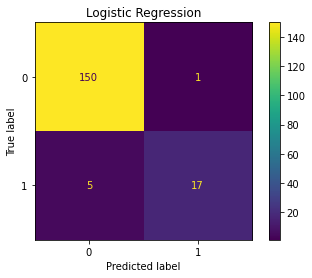

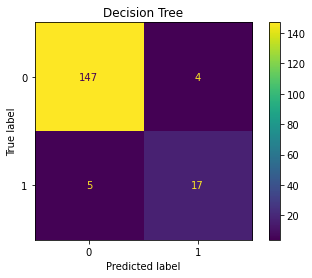

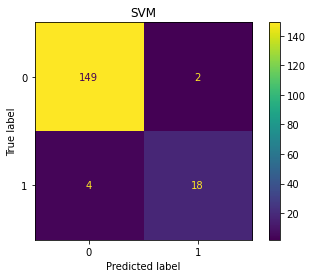

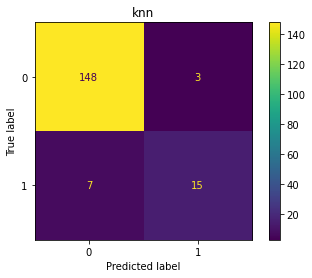

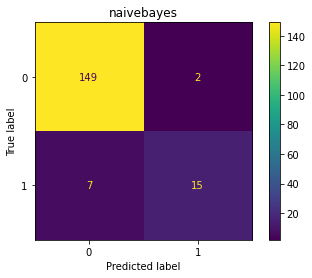

In [24]:
from sklearn.metrics import plot_confusion_matrix
labels = ['Logistic Regression', 'Decision Tree','SVM', 'knn','naivebayes']
for classifier, lab in zip([classifier1, classifier2, classifier3, classifier4, classifier5],
                         labels,
                         ):
    plot_confusion_matrix(classifier, X_test, y_test)
    plt.title(lab)
    # show the legend
    #plt.legend()
    # show the plot
    plt.show()